In [26]:
import pandas as pd
import altair as alt

In [27]:
df = pd.read_csv("./_data/sales.csv")

In [28]:
pwest = df[df.building_name == 'Promenade West']

## Promenade West

### Most recent sales

In [29]:
pwest.sort_values("date", ascending=False)[[
    'building_name',
    'date',
    'unit',
    'price',
    'square_feet',
    'price_per_square_foot'
]].head(5)

building_name        date unit     price  square_feet  \
1921  Promenade West  2018-06-12  527  600000.0       1323.0   
1922  Promenade West  2018-04-11  706  598000.0       1348.0   
1923  Promenade West  2018-02-01  409  590000.0       1323.0   
1924  Promenade West  2018-01-24  315  615000.0       1509.0   
1925  Promenade West  2017-12-13  804  455000.0       1006.0   

      price_per_square_foot  
1921             453.514739  
1922             443.620178  
1923             445.956160  
1924             407.554672  
1925             452.286282

### The pace of sales

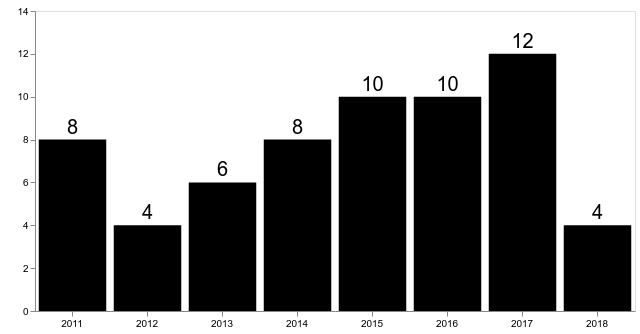

In [30]:
bars = alt.Chart(pwest).mark_bar(color="black").encode(
    x=alt.X("date:O", timeUnit="year", axis=alt.Axis(labelAngle=0, title="")),
    y=alt.Y("count()", scale=alt.Scale(domain=(0, 14)), axis=alt.Axis(title="", grid=False))
).properties(width=600)

text = bars.mark_text(
    align='center',
    baseline='middle',
    dy=-12,
    size=20
).encode(
    text='count()'
)

chart = bars + text

chart.configure_view(
    strokeOpacity=0
).save('assets/sales-by-year.svg')

chart

### Prices by date

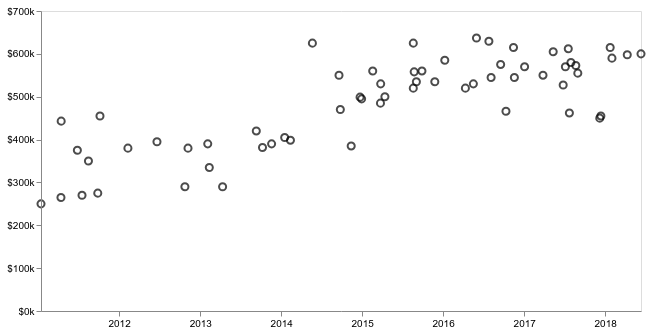

In [31]:
chart = alt.Chart(pwest).mark_point(size=50, color="black").encode(
    x=alt.X(
        "date:T",
        axis=alt.Axis(title="", format="%Y", tickCount=7, grid=False),
    ),
    y=alt.Y(
        "price:Q",
        axis=alt.Axis(title="", format="$s", grid=False),
        scale=alt.Scale(domain=[0, 700000])
    ),
    tooltip=["unit", "price", "square_feet", "price_per_square_foot"]
).properties(width=600)

chart.configure_view(
    strokeOpacity=0
).save('assets/price-by-date.svg')

chart

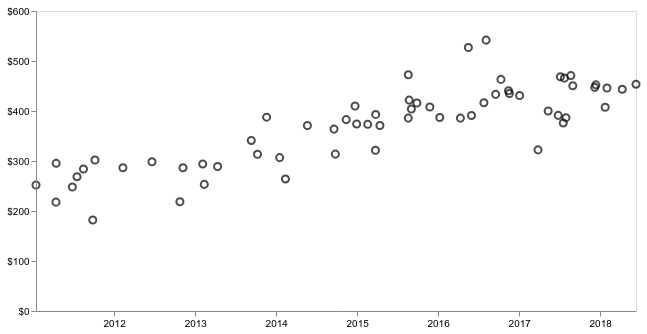

In [32]:
chart = alt.Chart(pwest).mark_point(size=50, color="black").encode(
    x=alt.X(
        "date:T",
        axis=alt.Axis(title="", format="%Y", tickCount=7, grid=False),
    ),
    y=alt.Y(
        "price_per_square_foot:Q",
        axis=alt.Axis(title="", format="$s", grid=False),
        scale=alt.Scale(domain=[0, 600])
    ),
    tooltip=["unit", "price", "square_feet", "price_per_square_foot"]
).properties(width=600)

chart.configure_view(
    strokeOpacity=0
).save('assets/price-per-sqft-by-date.svg')

chart

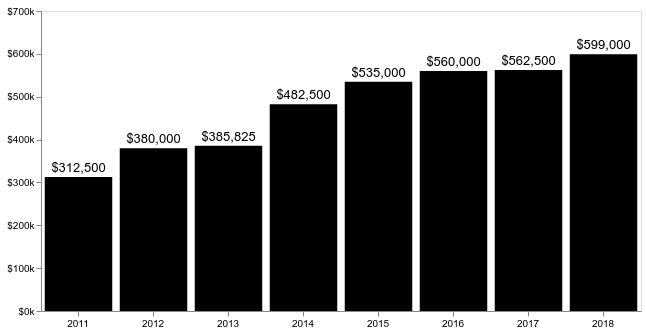

In [33]:
bars = alt.Chart(pwest).mark_bar(color="black").encode(
    x=alt.X(
        "date:O",
        timeUnit="year",
        axis=alt.Axis(title="", labelAngle=0),
    ),
    y=alt.Y(
        "median(price):Q",
        axis=alt.Axis(title="", format="$s", grid=False),
        scale=alt.Scale(domain=[0, 700000]),
    ),
).properties(width=600)

text = bars.mark_text(
    align='center',
    baseline='middle',
    dy=-9,
    size=13
).encode(
    text=alt.Text('median(price):Q', format="$,.0f")
)

chart = bars + text

chart.configure_view(
    strokeOpacity=0
).save('assets/price-by-year.svg')

chart

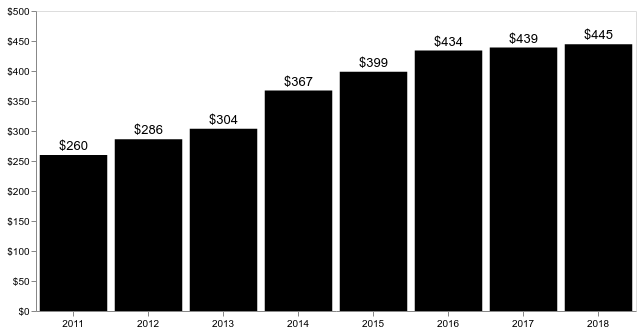

In [34]:
bars = alt.Chart(pwest).mark_bar(color="black").encode(
    x=alt.X(
        "date:O",
        timeUnit="year",
        axis=alt.Axis(title="", labelAngle=0),
    ),
    y=alt.Y(
        "median(price_per_square_foot):Q",
        axis=alt.Axis(title="", format="$s", grid=False),
        scale=alt.Scale(domain=[0, 500]),
    ),
).properties(width=600)

text = bars.mark_text(
    align='center',
    baseline='middle',
    dy=-9,
    size=13
).encode(
    text=alt.Text('median(price_per_square_foot):Q', format="$,.0f")
)

chart = bars + text

chart.configure_view(
    strokeOpacity=0
).save('assets/price-per-sqft-by-year.svg')

chart

## Bunker Hill

In [35]:
bunker_hill = df[df.region == 'Bunker Hill']

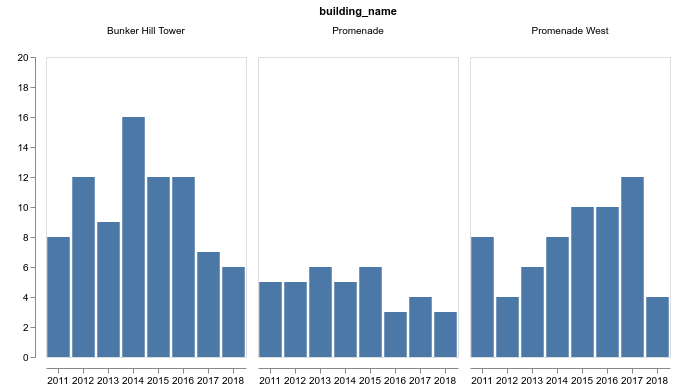

In [36]:
chart = alt.Chart(bunker_hill).mark_bar().encode(
    x=alt.X("date:O", timeUnit="year", axis=alt.Axis(labelAngle=0, title="")),
    y=alt.Y("count()", scale=alt.Scale(domain=(0, 20)), axis=alt.Axis(title="", grid=False)),
    column="building_name:N"
).properties(width=200)

# chart.configure_view(
#     strokeOpacity=0
# ).save('assets/sales-by-year.svg')

chart

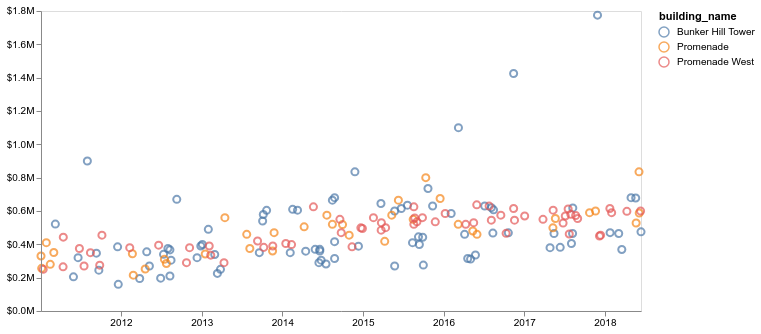

In [37]:
chart = alt.Chart(bunker_hill).mark_point(size=50).encode(
    x=alt.X(
        "date:T",
        axis=alt.Axis(title="", format="%Y", tickCount=7, grid=False),
    ),
    y=alt.Y(
        "price:Q",
        axis=alt.Axis(title="", format="$s", grid=False),
    ),
    color="building_name",
    tooltip=["building_name", "unit", "price", "square_feet", "price_per_square_foot"]
).properties(width=600)

# chart.configure_view(
#     strokeOpacity=0
# ).save('assets/price-by-date.svg')

chart

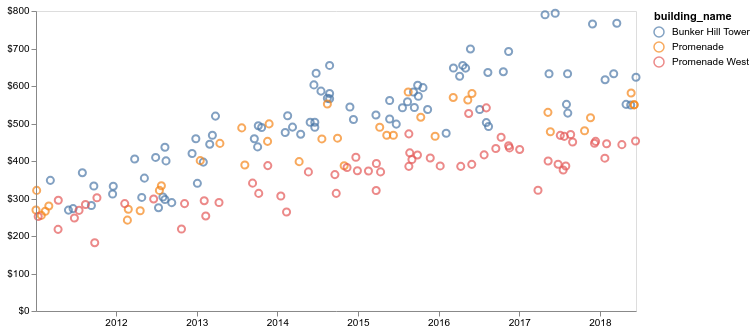

In [38]:
chart = alt.Chart(bunker_hill).mark_point(size=50).encode(
    x=alt.X(
        "date:T",
        axis=alt.Axis(title="", format="%Y", tickCount=7, grid=False),
    ),
    y=alt.Y(
        "price_per_square_foot:Q",
        axis=alt.Axis(title="", format="$s", grid=False)
    ),
    color="building_name:N",
    tooltip=["building_name", "unit", "price", "square_feet", "price_per_square_foot"]
).properties(width=600)

# chart.configure_view(
#     strokeOpacity=0
# ).save('assets/price-per-sqft-by-date.svg')

chart

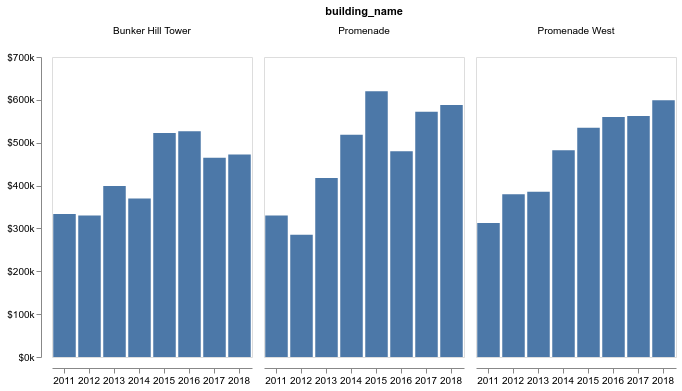

In [39]:
chart = alt.Chart(bunker_hill).mark_bar().encode(
    x=alt.X(
        "date:O",
        timeUnit="year",
        axis=alt.Axis(title="", labelAngle=0),
    ),
    y=alt.Y(
        "median(price):Q",
        axis=alt.Axis(title="", format="$s", grid=False),
        scale=alt.Scale(domain=[0, 700000]),
    ),
    column="building_name:N"
).properties(width=200)

# chart.configure_view(
#     strokeOpacity=0
# ).save('assets/price-by-year.svg')

chart

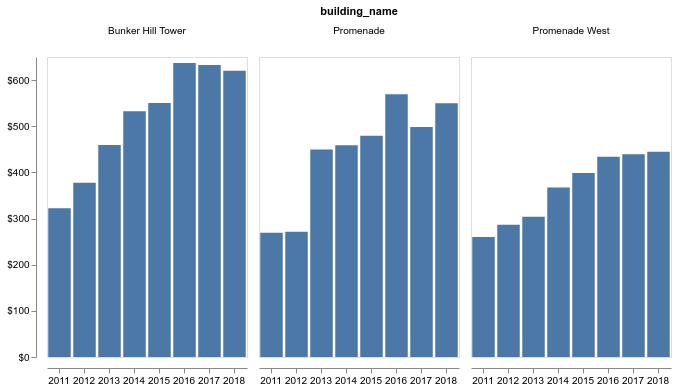

In [40]:
chart = alt.Chart(bunker_hill).mark_bar().encode(
    x=alt.X(
        "date:O",
        timeUnit="year",
        axis=alt.Axis(title="", labelAngle=0),
    ),
    y=alt.Y(
        "median(price_per_square_foot):Q",
        axis=alt.Axis(title="", format="$s", grid=False),
    ),
    column="building_name:N"
).properties(width=200)

# chart.configure_view(
#     strokeOpacity=0
# ).save('assets/price-by-year.svg')

chart

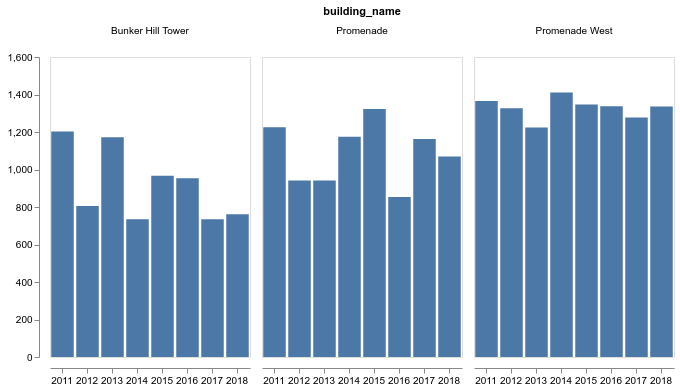

In [41]:
chart = alt.Chart(bunker_hill).mark_bar().encode(
    x=alt.X(
        "date:O",
        timeUnit="year",
        axis=alt.Axis(title="", labelAngle=0),
    ),
    y=alt.Y(
        "median(square_feet):Q",
        axis=alt.Axis(title="", grid=False),
    ),
    column="building_name:N"
).properties(width=200)

# chart.configure_view(
#     strokeOpacity=0
# ).save('assets/price-by-year.svg')

chart

## Region

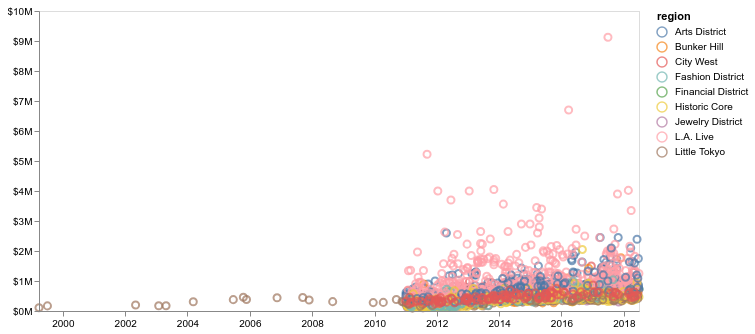

In [42]:
chart = alt.Chart(df).mark_point(size=50).encode(
    x=alt.X(
        "date:T",
        axis=alt.Axis(title="", format="%Y", tickCount=7, grid=False),
    ),
    y=alt.Y(
        "price:Q",
        axis=alt.Axis(title="", format="$s", grid=False),
    ),
    color="region",
    tooltip=["region", "building_name", "unit", "price", "square_feet", "price_per_square_foot"]
).properties(width=600)

# chart.configure_view(
#     strokeOpacity=0
# ).save('assets/price-by-date.svg')

chart

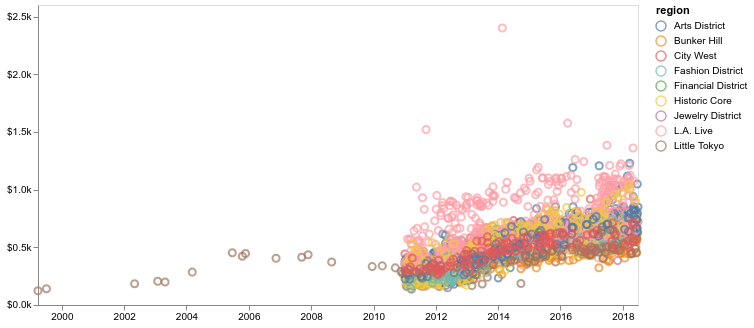

In [43]:
chart = alt.Chart(df).mark_point(size=50).encode(
    x=alt.X(
        "date:T",
        axis=alt.Axis(title="", format="%Y", tickCount=7, grid=False),
    ),
    y=alt.Y(
        "price_per_square_foot:Q",
        axis=alt.Axis(title="", format="$s", grid=False),
    ),
    color="region",
    tooltip=["region", "building_name", "unit", "price", "square_feet", "price_per_square_foot"]
).properties(width=600)

# chart.configure_view(
#     strokeOpacity=0
# ).save('assets/price-by-date.svg')

chart

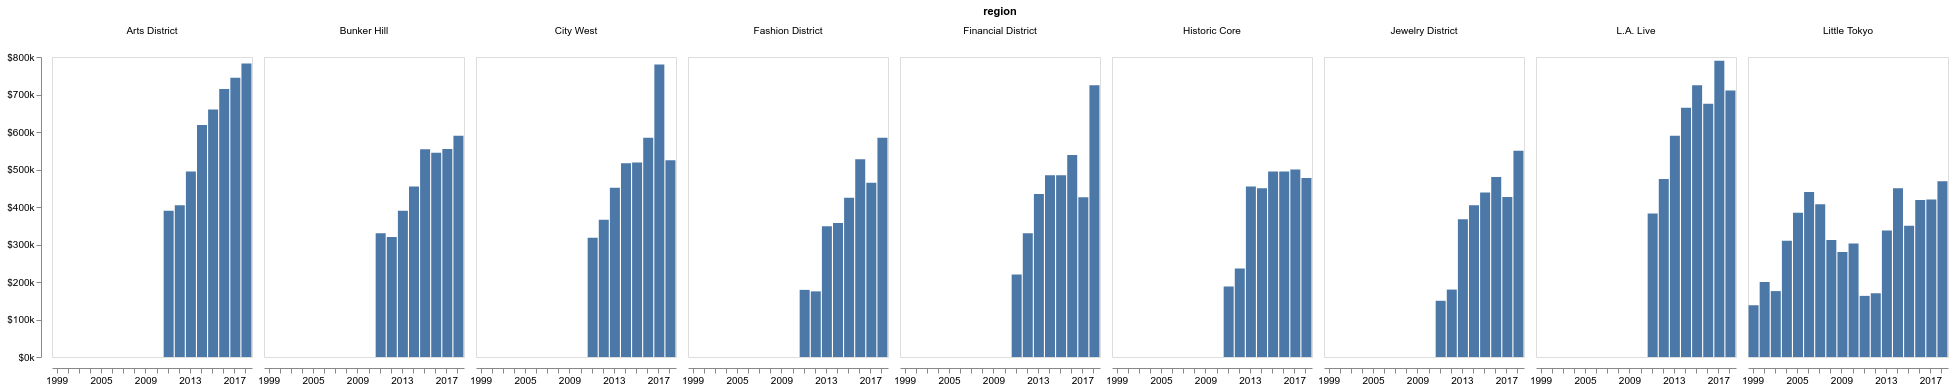

In [44]:
chart = alt.Chart(df).mark_bar().encode(
    x=alt.X(
        "date:O",
        timeUnit="year",
        axis=alt.Axis(title="", labelAngle=0),
    ),
    y=alt.Y(
        "median(price):Q",
        axis=alt.Axis(title="", format="$s", grid=False),
    ),
    column="region:N"
).properties(width=200)

# chart.configure_view(
#     strokeOpacity=0
# ).save('assets/price-by-year.svg')

chart

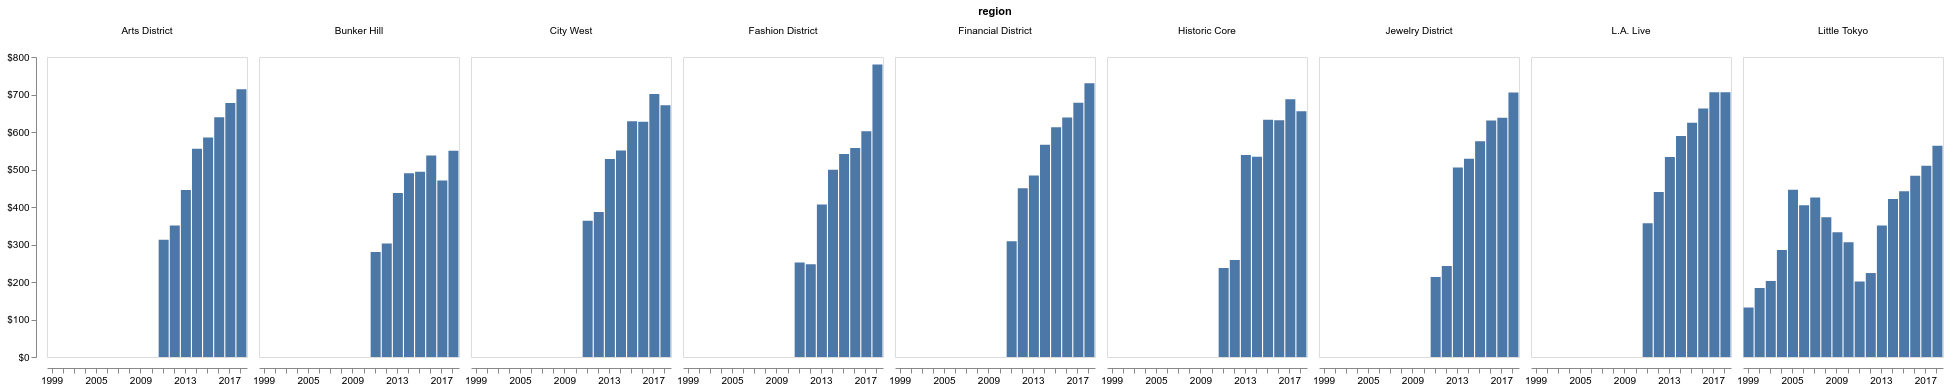

In [45]:
chart = alt.Chart(df).mark_bar().encode(
    x=alt.X(
        "date:O",
        timeUnit="year",
        axis=alt.Axis(title="", labelAngle=0),
    ),
    y=alt.Y(
        "median(price_per_square_foot):Q",
        axis=alt.Axis(title="", format="$s", grid=False),
    ),
    column="region:N"
).properties(width=200)

# chart.configure_view(
#     strokeOpacity=0
# ).save('assets/price-by-year.svg')

chart

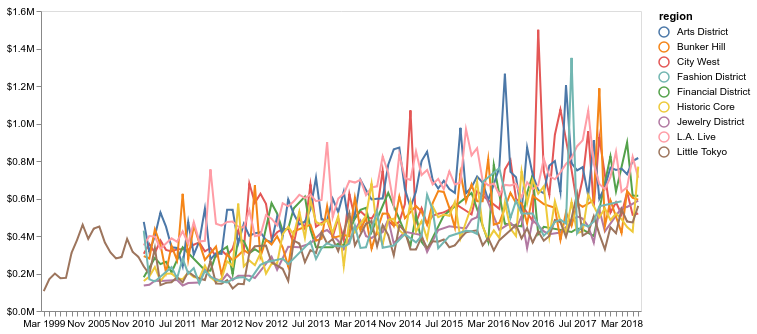

In [46]:
chart = alt.Chart(df).mark_line().encode(
    x=alt.X(
        "date:O",
        timeUnit="yearmonth",
        axis=alt.Axis(title="", labelAngle=0),
    ),
    y=alt.Y(
        "median(price):Q",
        axis=alt.Axis(title="", format="$s", grid=False),
    ),
    color="region:N"
).properties(width=600)

# chart.configure_view(
#     strokeOpacity=0
# ).save('assets/price-by-year.svg')

chart

## Rankings

In [47]:
building_ranking = df.groupby(["building_name", "region"]).agg({
    "unit": "count",
    "price": "median",
    "price_per_square_foot": "median",
    "square_feet": "median",
})

In [48]:
building_ranking.sort_values("price_per_square_foot", ascending=False)

price  square_feet  unit  \
building_name           region                                             
Metropolis Tower I      L.A. Live            973000.0        977.0    16   
Ritz Carlton            L.A. Live           1800000.0       1850.0    97   
Ten50                   L.A. Live            995000.0       1084.0    49   
The Rowan               Historic Core        505888.0        820.0    95   
Luma Lofts              L.A. Live            619000.0        990.0   151   
Concerto Lofts          L.A. Live            630000.0       1004.0    21   
Douglas                 Historic Core        465000.0        950.0    31   
El Dorado               Historic Core        675000.0       1020.0    25   
Mura                    Arts District        675000.0       1240.0    30   
Biscuit Company Lofts   Arts District        720000.0       1112.0    62   
Evo                     L.A. Live            695000.0       1160.0   162   
Barker Block Warehouse  Arts District        635000.0       1040.0    51   
110 Wilshire            City West            524000.0        820.0   131   
Sky Lofts               L.A. Live            763000.0       1320.0    94   
Market Lofts            L.A. Live            490000.0        820.0   145   
655 Hope                Financial District   504999.0        930.0    49   
Elleven Lofts           L.A. Live            585500.0       1090.0   103   
Skyline                 L.A. Live            510000.0       1193.0    85   
Toy Warehouse           Arts District        877500.0       1778.0    12   
Toy Factory             Arts District        660000.0       1438.0    69   
Beacon Lofts            Arts District        549000.0       1220.0    13   
Bartlett                Jewelry District     387000.0        740.0    90   
Bunker Hill Tower       Bunker Hill          402000.0        762.0    82   
Library Court           Financial District   369000.0        680.0    53   
Barker Block Lofts      Arts District        618702.5       1251.5   134   
Eastern Columbia        L.A. Live            665000.0       1200.0    85   
Vero                    City West            450000.0        995.0   118   
Higgins                 Historic Core        427000.0        840.0    71   
Savoy                   Arts District        400000.0        899.0   163   
Santee Village: Cornell Fashion District     344500.0        740.0    56   
Santee Village: Eckardt Fashion District     421000.0        880.0    37   
Promenade               Bunker Hill          480000.0       1053.0    37   
940 E. 2nd Street       Arts District        587500.0       1332.0    50   
Teramachi               Little Tokyo         421000.0        970.0    60   
Molino Street Lofts     Arts District        682500.0       1642.5    52   
Tokyo Villa             Little Tokyo         375000.0        863.0    59   
Grand Lofts             L.A. Live            595000.0       1450.0    32   
Flower Street Lofts     L.A. Live            590000.0       1438.0    61   
Gallery Lofts           Arts District        411900.0       1146.0    31   
Little Tokyo Lofts      Little Tokyo         340000.0        790.0   131   
Promenade West          Bunker Hill          520000.0       1325.5    62   
Tomahawk Lofts          Fashion District     692500.0       1804.5     2   
Pan American            Historic Core        315000.0        985.0    22   
Shy Barry Grand         Historic Core        230000.0        770.0   107   
Textile Building        Fashion District     250000.0        670.0    49   

                                            price_per_square_foot  
building_name           region                                     
Metropolis Tower I      L.A. Live                     1086.687415  
Ritz Carlton            L.A. Live                      974.358974  
Ten50                   L.A. Live                      927.374302  
The Rowan               Historic Core                  672.839506  
Luma Lofts              L.A. Live                      650.000000  

In [49]:
region_ranking = df.groupby(["region"]).agg({
    "unit": "count",
    "price": "median",
    "price_per_square_foot": "median",
    "square_feet": "median",
})

In [50]:
region_ranking.sort_values("price_per_square_foot", ascending=False)

price  square_feet  unit  price_per_square_foot
region                                                                
L.A. Live           638000.0       1160.0  1101             607.142857
Financial District  412500.0        745.0   102             545.571391
City West           495000.0        920.0   249             542.168675
Historic Core       416000.0        820.0   351             535.714286
Jewelry District    387000.0        740.0    90             520.202899
Arts District       580000.0       1160.0   667             519.587629
Bunker Hill         465000.0       1172.0   181             450.487013
Fashion District    351500.0        795.0   144             433.441558
Little Tokyo        355000.0        863.0   250             419.850022